
* Your goal is to create and tune the hyperparameters through a GridSearchCV of an SVC who is classifying images.

Steps: 
* Create an SVC model to classify drawn digits into their corresponding value.  Split your data into a 50% train and 50% test subset.  Ensure that the shuffle parameter is offand you are not randomizing this dataset.
* Create your grid search strategy intending to find the best model based on "F1-score".  Make sure your parameters include a wide range of values
* Create a dataframe and visualizations showing statistics of each model tried in the search.


In [29]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


digits = datasets.load_digits(as_frame = True)
#Display an image for debugging
def display_image(n):
    # Display the image with the target (digit) displayed above
    image = digits.images[n]
    target = digits.target[n]
    plt.figure(figsize = (1,1))
    plt.imshow(image, cmap='gray')
    plt.title(f'Target: {target}')
    plt.axis('off')
    plt.show()

#Your code here - write an SVC to classify the digits dataset!

In [18]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, shuffle = False)

In [109]:
model = svm.SVC()
print(model.get_params())

params = {'C' : [10**x/100 for x in range (1,6)],
          'gamma' : [10**x/10000 for x in range (1,6)],
          'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] 
          }
tuner = GridSearchCV(estimator=model, param_grid = params, scoring= 'f1_weighted')
tuner.fit(X_train,y_train)
tuner.best_estimator_.fit(X_train, y_train)


{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


SVC(C=10.0, gamma=0.001)

In [110]:
#heat map of performance for C and gamma per kernel
results = pd.DataFrame(tuner.cv_results_)

results = results[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score']]
results['param_C'] = pd.to_numeric(results['param_C'])
results['param_gamma'] = pd.to_numeric(results['param_gamma'])

results[results['param_kernel']=='sigmoid'].head()

,param_C,param_gamma,param_kernel,mean_test_score
3,0.1,0.001,sigmoid,0.048261
7,0.1,0.010,sigmoid,0.027511
11,0.1,0.100,sigmoid,0.018659
15,0.1,1.000,sigmoid,0.018659
19,0.1,10.000,sigmoid,0.018659


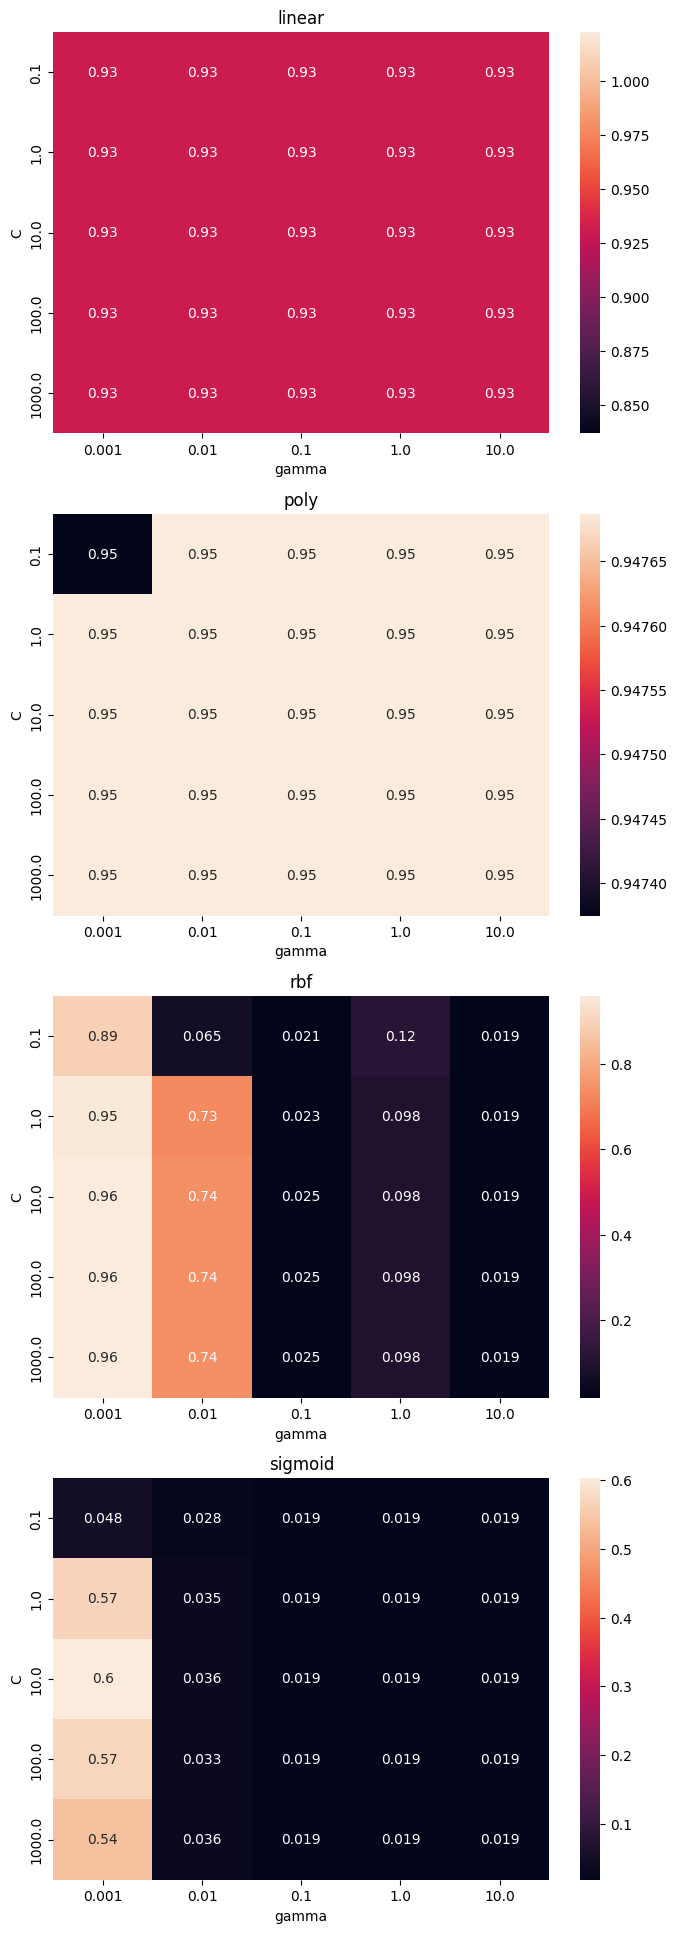

In [111]:

kernels = params['kernel']

# kernels = results.copy().groupby('kernel').agg()
fig, ax = plt.subplots(nrows = len(kernels), ncols = 1, figsize = (8, 24))
for i, kernel in enumerate(kernels):
    kernel_mask = results['param_kernel'] == kernel
    temp = results[kernel_mask].drop('param_kernel', axis = 1)
    temp = temp.pivot(index = 'param_C', columns = 'param_gamma', values = 'mean_test_score')
    
    sns.heatmap(temp, ax = ax[i], annot = True)
    ax[i].set_title(kernel)
    ax[i].set_xlabel('gamma')
    ax[i].set_ylabel('C')

Text(0, 0.5, 'F-score')

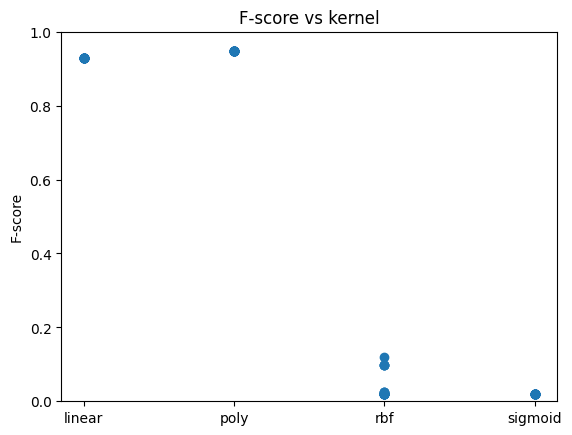

In [95]:
fig, ax = plt.subplots()
ax.scatter(results['param_kernel'], results['mean_test_score'])
ax.set_ybound(0,1)
ax.set_title("F-score vs kernel")
ax.set_ylabel("F-score")

Based on these results, poly or linear is the best kernel to use, but they seem to be unaffected by altering gamma and C. Next steps: test relevent poly and linear hyperparams 

In [98]:
# testing poly kernel parameters 
params = {
    'degree' : range(1,11),
}
model = svm.SVC(kernel = 'poly')
tuner = GridSearchCV(estimator=model, param_grid = params, scoring= 'f1_weighted')
tuner.fit(X_train,y_train)

GridSearchCV(estimator=SVC(kernel='poly'), param_grid={'degree': range(1, 11)},
             scoring='f1_weighted')

In [100]:
results = pd.DataFrame(tuner.cv_results_)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020744,0.005221,0.010156,0.002100,1,{'degree': 1},0.892936,0.949504,0.881082,0.949774,0.930604,0.920780,0.028683,8
1,0.015455,0.000390,0.007788,0.000535,2,{'degree': 2},0.910390,0.949769,0.883698,0.971909,0.954743,0.934102,0.032261,5
2,0.015213,0.000261,0.007225,0.000172,3,{'degree': 3},0.938751,0.983311,0.883698,0.983235,0.946930,0.947185,0.036624,1
3,0.015386,0.000301,0.006979,0.000151,4,{'degree': 4},0.944503,0.983311,0.886990,0.977649,0.941478,0.946786,0.034338,2
4,0.015743,0.000230,0.006698,0.000107,5,{'degree': 5},0.927571,0.983311,0.887148,0.977649,0.936314,0.942399,0.035287,3
